In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

c:\Users\salman\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [48]:
RAW_DATA_PATH = "../../data/raw/"

In [49]:
submissions_df = pd.read_csv(RAW_DATA_PATH + "submissions.csv")

In [50]:
submissions_df.head()

,__v,_id,contestId,createdAt,duringContest,fileContent,language,memory,output,points,problemId,status,time,updatedAt,userId
0,0,5b608157e228ec0020a1fcf5,5b5c89ef30db8a0020962414,2018-07-31T10:03:43.362Z,True,https://firebasestorage.googleapis.com/v0/b/si...,C++14,3452KB,https://firebasestorage.googleapis.com/v0/b/si...,0,5b5c8cd7276e2200208fed62,Accepted,0s,2018-11-11T06:21:18.721Z,5b5d756037392f89933e7514
1,0,5b649806c0b1b80020eb30e0,5b5c89ef30db8a0020962414,2018-08-03T12:29:34.750Z,True,https://firebasestorage.googleapis.com/v0/b/si...,C,0KB,https://firebasestorage.googleapis.com/v0/b/si...,0,5b5c8cd7276e2200208fed62,Time Limit Exceeded,0s,2018-11-11T06:21:18.621Z,5b6490e95969e7002076f330
2,0,5b6499a9eae2320020c43e8a,5b5c89ef30db8a0020962414,2018-08-03T12:36:33.554Z,True,https://firebasestorage.googleapis.com/v0/b/si...,C,0KB,https://firebasestorage.googleapis.com/v0/b/si...,0,5b5c8cd7276e2200208fed62,Time Limit Exceeded,0s,2018-11-11T06:21:18.656Z,5b6490e95969e7002076f330
3,0,5b649eebeae2320020c43e8f,5b5c89ef30db8a0020962414,2018-08-03T12:58:59.425Z,True,https://firebasestorage.googleapis.com/v0/b/si...,C,9416KB,https://firebasestorage.googleapis.com/v0/b/si...,0,5b5c8cd7276e2200208fed62,Wrong Answer,0s,2018-11-11T06:21:19.140Z,5b6490e95969e7002076f330
4,0,5b64a0d8eae2320020c43e91,5b5c89ef30db8a0020962414,2018-08-03T13:07:12.145Z,True,https://firebasestorage.googleapis.com/v0/b/si...,C,9416KB,https://firebasestorage.googleapis.com/v0/b/si...,0,5b5c8cd7276e2200208fed62,Accepted,0s,2018-11-11T06:21:18.574Z,5b6490e95969e7002076f330


In [5]:
submissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9236 entries, 0 to 9235
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   __v            9236 non-null   int64 
 1   _id            9236 non-null   object
 2   contestId      9236 non-null   object
 3   createdAt      9236 non-null   object
 4   duringContest  9236 non-null   bool  
 5   fileContent    9236 non-null   object
 6   language       9236 non-null   object
 7   memory         9236 non-null   object
 8   output         9236 non-null   object
 9   points         9236 non-null   int64 
 10  problemId      9236 non-null   object
 11  status         9236 non-null   object
 12  time           9236 non-null   object
 13  updatedAt      9236 non-null   object
 14  userId         9236 non-null   object
dtypes: bool(1), int64(2), object(12)
memory usage: 1019.3+ KB


In [6]:
submissions_df.describe()

,__v,points
count,9236.0,9236.000000
mean,0.0,32.066371
std,0.0,79.787440
min,0.0,-40.000000
25%,0.0,-15.000000
50%,0.0,-10.000000
75%,0.0,100.000000
max,0.0,400.000000


In [7]:
submissions_df.columns

Index(['__v', '_id', 'contestId', 'createdAt', 'duringContest', 'fileContent',
       'language', 'memory', 'output', 'points', 'problemId', 'status', 'time',
       'updatedAt', 'userId'],
      dtype='object')

In [8]:
TO_USE = ['duringContest','language','problemId','status','userId','points']

In [9]:
df = submissions_df[TO_USE]

In [10]:
df.head()

,duringContest,language,problemId,status,userId,points
0,True,C++14,5b5c8cd7276e2200208fed62,Accepted,5b5d756037392f89933e7514,0
1,True,C,5b5c8cd7276e2200208fed62,Time Limit Exceeded,5b6490e95969e7002076f330,0
2,True,C,5b5c8cd7276e2200208fed62,Time Limit Exceeded,5b6490e95969e7002076f330,0
3,True,C,5b5c8cd7276e2200208fed62,Wrong Answer,5b6490e95969e7002076f330,0
4,True,C,5b5c8cd7276e2200208fed62,Accepted,5b6490e95969e7002076f330,0


In [11]:
df.isnull().sum()

duringContest    0
language         0
problemId        0
status           0
userId           0
points           0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9236 entries, 0 to 9235
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   duringContest  9236 non-null   bool  
 1   language       9236 non-null   object
 2   problemId      9236 non-null   object
 3   status         9236 non-null   object
 4   userId         9236 non-null   object
 5   points         9236 non-null   int64 
dtypes: bool(1), int64(1), object(4)
memory usage: 369.9+ KB


In [13]:
df['duringContest'].values

array([ True,  True,  True, ..., False, False, False])

In [14]:
df.duringContest.value_counts()

True     7221
False    2015
Name: duringContest, dtype: int64

In [15]:
df.language.value_counts()

Python3       4123
C++           2224
C             1467
Java          1037
C++14          313
Python          44
Go              17
Javascript      11
Name: language, dtype: int64

In [16]:
df_language_duringContest = df.groupby(['language','duringContest']).size().reset_index(name='counts')

In [17]:
df_language_duringContest

,language,duringContest,counts
0,C,False,233
1,C,True,1234
2,C++,False,509
3,C++,True,1715
4,C++14,False,88
5,C++14,True,225
6,Go,False,6
7,Go,True,11
8,Java,False,160
9,Java,True,877


In [18]:
df_group_status_language_by_duringContest = df.groupby(['status','language','duringContest','problemId']).size().reset_index(name='counts')

df_group_status_language_by_duringContest

,status,language,duringContest,problemId,counts
0,Accepted,C,False,5b645f711b2cd40020b6c771,2
1,Accepted,C,False,5b64600d1b2cd40020b6c772,1
2,Accepted,C,False,5b649819c0b1b80020eb30e1,3
3,Accepted,C,False,5b6c3ec18cab100020e963b7,4
4,Accepted,C,False,5b6c3fc08cab100020e963b8,2
...,...,...,...,...,...
2341,Wrong Answer,Python3,True,63309bcaab6261002246d347,2
2342,Wrong Answer,Python3,True,63309d795766d0002293b563,4
2343,Wrong Answer,Python3,True,6330dde45766d0002293b565,6
2344,Wrong Answer,Python3,True,63361b9a125f8a00222e06ef,1


In [19]:
success_score = df_group_status_language_by_duringContest
# [(df_group_status_language_by_duringContest['status'] == 'Accepted') & (df_group_status_language_by_duringContest['duringContest'] == True)]

In [20]:
success_score

,status,language,duringContest,problemId,counts
0,Accepted,C,False,5b645f711b2cd40020b6c771,2
1,Accepted,C,False,5b64600d1b2cd40020b6c772,1
2,Accepted,C,False,5b649819c0b1b80020eb30e1,3
3,Accepted,C,False,5b6c3ec18cab100020e963b7,4
4,Accepted,C,False,5b6c3fc08cab100020e963b8,2
...,...,...,...,...,...
2341,Wrong Answer,Python3,True,63309bcaab6261002246d347,2
2342,Wrong Answer,Python3,True,63309d795766d0002293b563,4
2343,Wrong Answer,Python3,True,6330dde45766d0002293b565,6
2344,Wrong Answer,Python3,True,63361b9a125f8a00222e06ef,1


In [21]:
success_score.language.value_counts()

Python3       801
C++           635
Java          360
C             357
C++14         148
Python         27
Go             12
Javascript      6
Name: language, dtype: int64

In [22]:
# # making the feature with type of language
# success_score_language = pd.get_dummies(success_score['language'])
# # associating with the problemId
# success_score_language['problemId'] = success_score['problemId']
# # success_score_language

# success_score_language = success_score_language.groupby(['problemId']).sum().reset_index()
# success_score_language

# success_score_language['language_count'] = success_score_language['C'] + success_score_language['C++']  + success_score_language['Java'] + success_score_language['Javascript'] + success_score_language['Python3']

# success_score_language

In [23]:
test = success_score[success_score.problemId == '5c39f0543646190022847c61']
test

,status,language,duringContest,problemId,counts
50,Accepted,C,True,5c39f0543646190022847c61,5
207,Accepted,C++,True,5c39f0543646190022847c61,10
383,Accepted,C++14,True,5c39f0543646190022847c61,2
402,Accepted,Go,True,5c39f0543646190022847c61,1
460,Accepted,Java,True,5c39f0543646190022847c61,5
560,Accepted,Python3,False,5c39f0543646190022847c61,2
693,Accepted,Python3,True,5c39f0543646190022847c61,14
900,Compilation Error,C++,True,5c39f0543646190022847c61,2
960,Compilation Error,C++14,True,5c39f0543646190022847c61,1
1054,Runtime Error,C,True,5c39f0543646190022847c61,3


In [24]:
success_score

,status,language,duringContest,problemId,counts
0,Accepted,C,False,5b645f711b2cd40020b6c771,2
1,Accepted,C,False,5b64600d1b2cd40020b6c772,1
2,Accepted,C,False,5b649819c0b1b80020eb30e1,3
3,Accepted,C,False,5b6c3ec18cab100020e963b7,4
4,Accepted,C,False,5b6c3fc08cab100020e963b8,2
...,...,...,...,...,...
2341,Wrong Answer,Python3,True,63309bcaab6261002246d347,2
2342,Wrong Answer,Python3,True,63309d795766d0002293b563,4
2343,Wrong Answer,Python3,True,6330dde45766d0002293b565,6
2344,Wrong Answer,Python3,True,63361b9a125f8a00222e06ef,1


In [25]:
success_score.groupby(['duringContest']).size().reset_index(name='counts')

,duringContest,counts
0,False,769
1,True,1577


In [26]:
test

,status,language,duringContest,problemId,counts
50,Accepted,C,True,5c39f0543646190022847c61,5
207,Accepted,C++,True,5c39f0543646190022847c61,10
383,Accepted,C++14,True,5c39f0543646190022847c61,2
402,Accepted,Go,True,5c39f0543646190022847c61,1
460,Accepted,Java,True,5c39f0543646190022847c61,5
560,Accepted,Python3,False,5c39f0543646190022847c61,2
693,Accepted,Python3,True,5c39f0543646190022847c61,14
900,Compilation Error,C++,True,5c39f0543646190022847c61,2
960,Compilation Error,C++14,True,5c39f0543646190022847c61,1
1054,Runtime Error,C,True,5c39f0543646190022847c61,3


In [27]:
success_score

,status,language,duringContest,problemId,counts
0,Accepted,C,False,5b645f711b2cd40020b6c771,2
1,Accepted,C,False,5b64600d1b2cd40020b6c772,1
2,Accepted,C,False,5b649819c0b1b80020eb30e1,3
3,Accepted,C,False,5b6c3ec18cab100020e963b7,4
4,Accepted,C,False,5b6c3fc08cab100020e963b8,2
...,...,...,...,...,...
2341,Wrong Answer,Python3,True,63309bcaab6261002246d347,2
2342,Wrong Answer,Python3,True,63309d795766d0002293b563,4
2343,Wrong Answer,Python3,True,6330dde45766d0002293b565,6
2344,Wrong Answer,Python3,True,63361b9a125f8a00222e06ef,1


In [28]:
test_pivote = success_score.pivot_table(index='problemId', columns='language', values='counts', aggfunc='sum').reset_index()

In [29]:
test_pivote.head()

language,problemId,C,C++,C++14,Go,Java,Javascript,Python,Python3
0,5b5c8cd7276e2200208fed62,65.0,50.0,16.0,5.0,27.0,NaN,1.0,48.0
1,5b645f711b2cd40020b6c771,18.0,12.0,4.0,NaN,14.0,NaN,2.0,36.0
2,5b64600d1b2cd40020b6c772,3.0,7.0,2.0,NaN,5.0,NaN,NaN,17.0
3,5b649819c0b1b80020eb30e1,12.0,16.0,5.0,NaN,33.0,NaN,1.0,40.0
4,5b6c3ec18cab100020e963b7,62.0,33.0,4.0,NaN,23.0,4.0,2.0,24.0


In [30]:
test_pivote.problemId.size

204

In [31]:
submissions_df.problemId.unique().size

204

In [32]:
success_score.problemId.unique().size

204

In [33]:
df_group_status_language_by_duringContest.problemId.unique().size

204

In [34]:
test_pivote.to_csv('success_score.csv', index=False)

In [35]:
df.head()

,duringContest,language,problemId,status,userId,points
0,True,C++14,5b5c8cd7276e2200208fed62,Accepted,5b5d756037392f89933e7514,0
1,True,C,5b5c8cd7276e2200208fed62,Time Limit Exceeded,5b6490e95969e7002076f330,0
2,True,C,5b5c8cd7276e2200208fed62,Time Limit Exceeded,5b6490e95969e7002076f330,0
3,True,C,5b5c8cd7276e2200208fed62,Wrong Answer,5b6490e95969e7002076f330,0
4,True,C,5b5c8cd7276e2200208fed62,Accepted,5b6490e95969e7002076f330,0


In [36]:
pd.crosstab(df['language'], df['duringContest'])

duringContest,False,True
language,,
C,233,1234
C++,509,1715
C++14,88,225
Go,6,11
Java,160,877
Javascript,0,11
Python,4,40
Python3,1015,3108


<AxesSubplot:xlabel='language'>

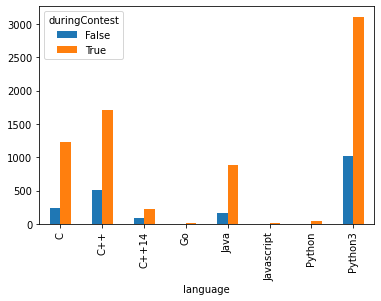

In [37]:
pd.crosstab(df['language'], df['duringContest']).plot(kind='bar')

In [38]:
during_pivote = pd.crosstab(df['language'],df['problemId'])

during_pivote

problemId,5b5c8cd7276e2200208fed62,5b645f711b2cd40020b6c771,5b64600d1b2cd40020b6c772,5b649819c0b1b80020eb30e1,5b6c3ec18cab100020e963b7,5b6c3fc08cab100020e963b8,5b6c42d08cab100020e963b9,5b714d3c155c0000206d76fc,5b72e7f9750b6100209d9f12,5b72f1a5750b6100209d9f13,...,63309bcaab6261002246d347,63309d795766d0002293b563,6330dde45766d0002293b565,6335f3dd125f8a00222e06eb,6335f8b9125f8a00222e06ec,63361b9a125f8a00222e06ef,633620e3fe6e62002205e71e,6336ad26ee62f10022c977c2,6336b760ee62f10022c97c37,6336c0b1f9be3c00226020f2
language,,,,,,,,,,,,,,,,,,,,,
C,65,18,3,12,62,16,14,5,50,5,...,4,8,23,0,0,0,1,0,0,0
C++,50,12,7,16,33,5,16,4,15,5,...,21,13,16,14,14,4,11,9,7,0
C++14,16,4,2,5,4,8,6,4,16,3,...,0,0,0,0,0,0,0,0,0,0
Go,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Java,27,14,5,33,23,8,11,9,12,4,...,16,11,20,1,1,1,0,1,3,0
Javascript,0,0,0,0,4,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
Python,1,2,0,1,2,0,1,0,2,0,...,0,0,0,0,0,0,0,0,0,0
Python3,48,36,17,40,24,16,29,14,35,19,...,39,14,19,5,3,3,0,4,0,1


In [39]:
during_contest_df = df[df['duringContest'] == True]

during_contest_df.head()

,duringContest,language,problemId,status,userId,points
0,True,C++14,5b5c8cd7276e2200208fed62,Accepted,5b5d756037392f89933e7514,0
1,True,C,5b5c8cd7276e2200208fed62,Time Limit Exceeded,5b6490e95969e7002076f330,0
2,True,C,5b5c8cd7276e2200208fed62,Time Limit Exceeded,5b6490e95969e7002076f330,0
3,True,C,5b5c8cd7276e2200208fed62,Wrong Answer,5b6490e95969e7002076f330,0
4,True,C,5b5c8cd7276e2200208fed62,Accepted,5b6490e95969e7002076f330,0


In [40]:
not_during_pivote = pd.crosstab(during_contest_df['language'], during_contest_df['problemId'])
not_during_pivote

problemId,5b5c8cd7276e2200208fed62,5b645f711b2cd40020b6c771,5b64600d1b2cd40020b6c772,5b649819c0b1b80020eb30e1,5b6c3ec18cab100020e963b7,5b6c3fc08cab100020e963b8,5b6c42d08cab100020e963b9,5b714d3c155c0000206d76fc,5b72e7f9750b6100209d9f12,5b72f1a5750b6100209d9f13,...,63309bcaab6261002246d347,63309d795766d0002293b563,6330dde45766d0002293b565,6335f3dd125f8a00222e06eb,6335f8b9125f8a00222e06ec,63361b9a125f8a00222e06ef,633620e3fe6e62002205e71e,6336ad26ee62f10022c977c2,6336b760ee62f10022c97c37,6336c0b1f9be3c00226020f2
language,,,,,,,,,,,,,,,,,,,,,
C,65,15,2,7,34,14,12,5,48,5,...,4,8,23,0,0,0,1,0,0,0
C++,49,1,1,2,8,1,4,2,10,0,...,21,12,16,14,14,4,11,8,5,0
C++14,16,1,1,0,4,2,3,3,10,2,...,0,0,0,0,0,0,0,0,0,0
Go,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Java,27,12,3,32,16,8,9,6,12,4,...,16,11,20,1,1,1,0,1,3,0
Javascript,0,0,0,0,4,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
Python,1,2,0,1,2,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
Python3,41,9,6,20,17,10,11,6,16,9,...,39,14,19,5,3,3,0,4,0,1


In [41]:
not_during_contest_df = df[df['duringContest'] == False]

not_during_pivote = pd.crosstab(not_during_contest_df['language'], not_during_contest_df['problemId'])

In [42]:
# concatenating the two pivotes with the same columns and rows having not during contest and during contest

# adding not_ before the index values
not_during_pivote.index = 'not_' + not_during_pivote.index
not_during_pivote
conct = pd.concat([during_pivote, not_during_pivote])
conct

problemId,5b5c8cd7276e2200208fed62,5b645f711b2cd40020b6c771,5b64600d1b2cd40020b6c772,5b649819c0b1b80020eb30e1,5b6c3ec18cab100020e963b7,5b6c3fc08cab100020e963b8,5b6c42d08cab100020e963b9,5b714d3c155c0000206d76fc,5b72e7f9750b6100209d9f12,5b72f1a5750b6100209d9f13,...,63309bcaab6261002246d347,63309d795766d0002293b563,6330dde45766d0002293b565,6335f3dd125f8a00222e06eb,6335f8b9125f8a00222e06ec,63361b9a125f8a00222e06ef,633620e3fe6e62002205e71e,6336ad26ee62f10022c977c2,6336b760ee62f10022c97c37,6336c0b1f9be3c00226020f2
language,,,,,,,,,,,,,,,,,,,,,
C,65,18,3,12,62,16,14,5,50,5,...,4.0,8,23.0,0.0,0.0,0.0,1.0,0,0,0.0
C++,50,12,7,16,33,5,16,4,15,5,...,21.0,13,16.0,14.0,14.0,4.0,11.0,9,7,0.0
C++14,16,4,2,5,4,8,6,4,16,3,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
Go,5,0,0,0,0,0,0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
Java,27,14,5,33,23,8,11,9,12,4,...,16.0,11,20.0,1.0,1.0,1.0,0.0,1,3,0.0
Javascript,0,0,0,0,4,0,0,0,3,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
Python,1,2,0,1,2,0,1,0,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
Python3,48,36,17,40,24,16,29,14,35,19,...,39.0,14,19.0,5.0,3.0,3.0,0.0,4,0,1.0
not_C,0,3,1,5,28,2,2,0,2,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN


In [43]:
conct

problemId,5b5c8cd7276e2200208fed62,5b645f711b2cd40020b6c771,5b64600d1b2cd40020b6c772,5b649819c0b1b80020eb30e1,5b6c3ec18cab100020e963b7,5b6c3fc08cab100020e963b8,5b6c42d08cab100020e963b9,5b714d3c155c0000206d76fc,5b72e7f9750b6100209d9f12,5b72f1a5750b6100209d9f13,...,63309bcaab6261002246d347,63309d795766d0002293b563,6330dde45766d0002293b565,6335f3dd125f8a00222e06eb,6335f8b9125f8a00222e06ec,63361b9a125f8a00222e06ef,633620e3fe6e62002205e71e,6336ad26ee62f10022c977c2,6336b760ee62f10022c97c37,6336c0b1f9be3c00226020f2
language,,,,,,,,,,,,,,,,,,,,,
C,65,18,3,12,62,16,14,5,50,5,...,4.0,8,23.0,0.0,0.0,0.0,1.0,0,0,0.0
C++,50,12,7,16,33,5,16,4,15,5,...,21.0,13,16.0,14.0,14.0,4.0,11.0,9,7,0.0
C++14,16,4,2,5,4,8,6,4,16,3,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
Go,5,0,0,0,0,0,0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
Java,27,14,5,33,23,8,11,9,12,4,...,16.0,11,20.0,1.0,1.0,1.0,0.0,1,3,0.0
Javascript,0,0,0,0,4,0,0,0,3,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
Python,1,2,0,1,2,0,1,0,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
Python3,48,36,17,40,24,16,29,14,35,19,...,39.0,14,19.0,5.0,3.0,3.0,0.0,4,0,1.0
not_C,0,3,1,5,28,2,2,0,2,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN


In [44]:
not_during_pivote

problemId,5b5c8cd7276e2200208fed62,5b645f711b2cd40020b6c771,5b64600d1b2cd40020b6c772,5b649819c0b1b80020eb30e1,5b6c3ec18cab100020e963b7,5b6c3fc08cab100020e963b8,5b6c42d08cab100020e963b9,5b714d3c155c0000206d76fc,5b72e7f9750b6100209d9f12,5b72f1a5750b6100209d9f13,...,6301d0e28296fc0022ebb48e,6301e8473a18140022ffed0d,63308489ab6261002246d32b,633091c9ab6261002246d333,63309651ab6261002246d342,63309926ab6261002246d343,63309a73ab6261002246d344,63309d795766d0002293b563,6336ad26ee62f10022c977c2,6336b760ee62f10022c97c37
language,,,,,,,,,,,,,,,,,,,,,
not_C,0,3,1,5,28,2,2,0,2,0,...,0,0,0,1,0,0,1,0,0,0
not_C++,1,11,6,14,25,4,12,2,5,5,...,0,0,1,0,0,0,0,1,1,2
not_C++14,0,3,1,5,0,6,3,1,6,1,...,0,0,0,0,0,0,0,0,0,0
not_Go,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
not_Java,0,2,2,1,7,0,2,3,0,0,...,0,0,1,0,3,0,0,0,0,0
not_Python,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
not_Python3,7,27,11,20,7,6,18,8,19,10,...,2,3,1,0,0,3,0,0,0,0


In [45]:
# swapping the columns
conct = conct.T
conct

language,C,C++,C++14,Go,Java,Javascript,Python,Python3,not_C,not_C++,not_C++14,not_Go,not_Java,not_Python,not_Python3
problemId,,,,,,,,,,,,,,,
5b5c8cd7276e2200208fed62,65.0,50.0,16.0,5.0,27.0,0.0,1.0,48.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0
5b645f711b2cd40020b6c771,18.0,12.0,4.0,0.0,14.0,0.0,2.0,36.0,3.0,11.0,3.0,0.0,2.0,0.0,27.0
5b64600d1b2cd40020b6c772,3.0,7.0,2.0,0.0,5.0,0.0,0.0,17.0,1.0,6.0,1.0,0.0,2.0,0.0,11.0
5b649819c0b1b80020eb30e1,12.0,16.0,5.0,0.0,33.0,0.0,1.0,40.0,5.0,14.0,5.0,0.0,1.0,0.0,20.0
5b6c3ec18cab100020e963b7,62.0,33.0,4.0,0.0,23.0,4.0,2.0,24.0,28.0,25.0,0.0,0.0,7.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63361b9a125f8a00222e06ef,0.0,4.0,0.0,0.0,1.0,0.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
633620e3fe6e62002205e71e,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6336ad26ee62f10022c977c2,0.0,9.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# calculating the success rate as the ratio of the number of accepted submissions to the total number of submissions

df_success_rate = conct['C'] / (conct['C'] + conct['not_C'])
df_success_rate

problemId
5b5c8cd7276e2200208fed62    1.000000
5b645f711b2cd40020b6c771    0.857143
5b64600d1b2cd40020b6c772    0.750000
5b649819c0b1b80020eb30e1    0.705882
5b6c3ec18cab100020e963b7    0.688889
                              ...   
63361b9a125f8a00222e06ef         NaN
633620e3fe6e62002205e71e         NaN
6336ad26ee62f10022c977c2         NaN
6336b760ee62f10022c97c37         NaN
6336c0b1f9be3c00226020f2         NaN
Length: 204, dtype: float64

In [47]:
df.status.value_counts()


Wrong Answer           3608
Accepted               2928
Runtime Error          1322
Time Limit Exceeded     932
Compilation Error       446
Name: status, dtype: int64